# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset.

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Inspect the shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

print("Shape of y_train after one-hot encoding:", y_train_one_hot.shape)
print("Shape of y_test after one-hot encoding:", y_test_one_hot.shape)

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)
Shape of y_train after one-hot encoding: (60000, 10)
Shape of y_test after one-hot encoding: (10000, 10)


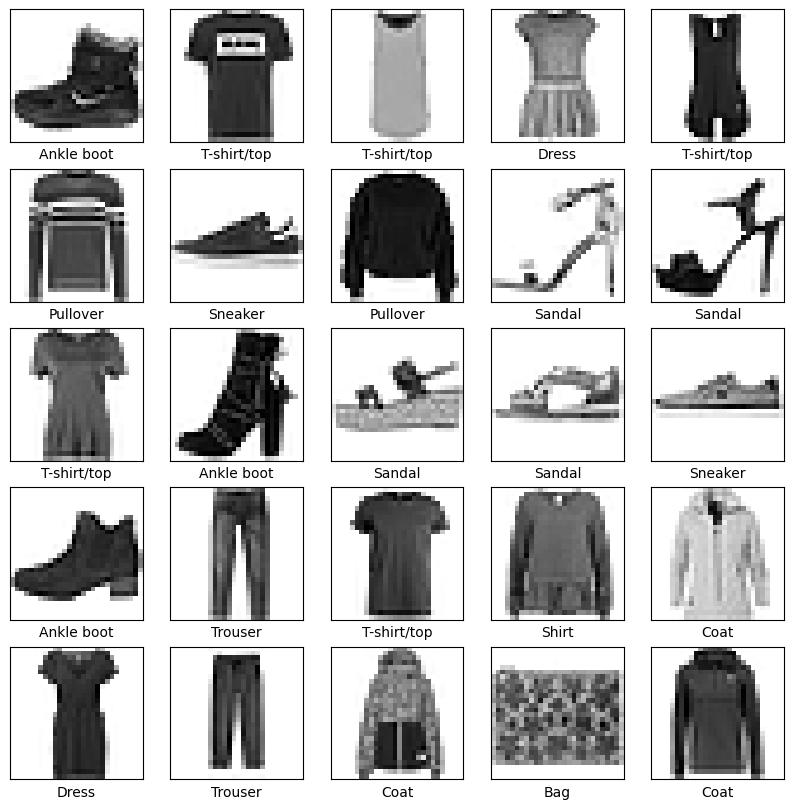

In [5]:
import matplotlib.pyplot as plt

# Visualize a few images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**
The images are not clear but for the most part the type of image is distinguishable and corretly tagged.  For example the 2 trousers are clearly distinguishable while the bag is less so. This issue with lack of clarity could potentially make it challenging for the model to correctly identify images and could lead to misclassification.



# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Create a simple linear regression model
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # Flatten the 2D images to 1D vectors
model.add(Dense(10, activation='linear')) # Output layer with 10 units for 10 classes, linear activation for linear regression

# Compile the model using `model.compile()`
model.compile(optimizer=Adam(),
              loss='mean_squared_error', # Appropriate loss for linear regression
              metrics=['accuracy'])

# Train the model with `model.fit()`
history = model.fit(X_train, y_train_one_hot, epochs=10, validation_split=0.2) # Using one-hot encoded labels for training

# Evaluate the model with `model.evaluate()`
loss, accuracy = model.evaluate(X_test, y_test_one_hot) # Using one-hot encoded labels for evaluation
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6574 - loss: 0.0754 - val_accuracy: 0.7803 - val_loss: 0.0466
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8040 - loss: 0.0422 - val_accuracy: 0.7839 - val_loss: 0.0435
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8146 - loss: 0.0401 - val_accuracy: 0.8143 - val_loss: 0.0388
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8133 - loss: 0.0397 - val_accuracy: 0.8153 - val_loss: 0.0388
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8124 - loss: 0.0393 - val_accuracy: 0.8097 - val_loss: 0.0401
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8175 - loss: 0.0387 - val_accuracy: 0.7937 - val_loss: 0.0409
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8148 - loss: 0.0388 - val_accuracy: 0.8038 - val_loss: 0.0402
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8175 - loss: 0.0385 - 

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**
The data shows a steady decrease in loss   during training with a final 0.0422 test loss, which indicates that there is a better fit to the baseline model's prediction of unseen data. decrease in both training and validation loss during training, indicating that the model was learning. The final test loss was also comparable to the validation loss, which suggests that the model did not significantly overfit the training data. The model also correctly classified the training data with 78.7% accuracy. This is likely because of the image quality and the limitations of a simpler model in accurately identifying more complex visual patterns. Accuracy however is the primary metric for classification tasks. I didnt quite know what to expect.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # Output layer with softmax activation for multi-class classification

# Compile the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8055 - loss: 0.5481 - val_accuracy: 0.8779 - val_loss: 0.3371
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.8965 - loss: 0.2830 - val_accuracy: 0.9001 - val_loss: 0.2806
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9170 - loss: 0.2254 - val_accuracy: 0.9061 - val_loss: 0.2642
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9259 - loss: 0.1947 - val_accuracy: 0.9112 - val_loss: 0.2485
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9396 - loss: 0.1640 - val_accuracy: 0.9143 - val_loss: 0.2432
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.9478 - loss: 0.1425 - val_accuracy: 0.9133 - val_loss: 0.2595
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9554 - loss: 0.1186 - val_accuracy: 0.9096 - val_loss: 0.2749
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.9634 -

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**
There is a a steady decrease in loss for the cnn model with a final training loss of 0.067, a test loss of 0.3234 and an accuracy of 91.3%. The cnn model performed significantly better than the linear model approximately 12% better.

This substantial improvement is primarily attributed to the architecture of the CNN. Unlike the linear model which flattens the image data, the convolutional layers in the CNN are able to learn spatial hierarchies and important features within the images, such as edges, shapes, and textures. The pooling layers help to reduce the spatial dimensions and make the model more robust to variations in the image.

The gap between training accuracy of 97.6% and test accuracy of 91.3% suggests there might be some degree of overfitting, although the model still generalizes much better than the baseline. Further experimentation with regularization techniques could help mitigate this.

# 4. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

Experimenting with number of filters:

Training with 32 filters...
Test Accuracy with 32 filters: 0.9052

Training with 64 filters...
Test Accuracy with 64 filters: 0.9098

Training with 128 filters...
Test Accuracy with 128 filters: 0.9108

Hyperparameter Experiment Results (Number of Filters):
Filters: 32, Test Accuracy: 0.9052
Filters: 64, Test Accuracy: 0.9098
Filters: 128, Test Accuracy: 0.9108


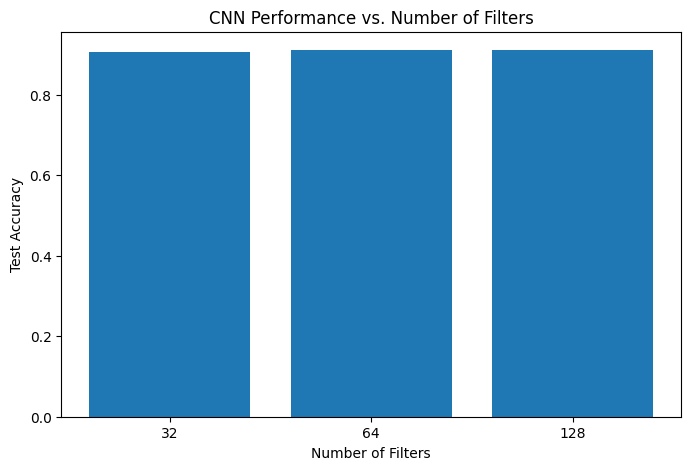

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt

# Reshape data if not already done (important if running this cell independently)
if X_train.shape[-1] != 1:
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)

# Define hyperparameters to test
filter_counts = [32, 64, 128]
results_hyperparameter = {}

print("Experimenting with number of filters:")

for filters in filter_counts:
    print(f"\nTraining with {filters} filters...")

    # Re-initialize the model for each experiment
    model = Sequential()
    model.add(Conv2D(filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss=categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])

    # Train the model (using fewer epochs for quicker experimentation)
    history = model.fit(X_train, y_train_one_hot, epochs=5, validation_split=0.2, verbose=0) # verbose=0 to reduce output

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0) # verbose=0 to reduce output
    print(f"Test Accuracy with {filters} filters: {accuracy:.4f}")

    # Store the results
    results_hyperparameter[filters] = accuracy

# Print summary of hyperparameter experiments
print("\nHyperparameter Experiment Results (Number of Filters):")
for filters, accuracy in results_hyperparameter.items():
    print(f"Filters: {filters}, Test Accuracy: {accuracy:.4f}")

# Optional: Visualize the results
plt.figure(figsize=(8, 5))
plt.bar(list(map(str, results_hyperparameter.keys())), list(results_hyperparameter.values())) # Convert keys and values to lists
plt.xlabel("Number of Filters")
plt.ylabel("Test Accuracy")
plt.title("CNN Performance vs. Number of Filters")
plt.show()

Experimenting with Dropout regularization:

Training model No Dropout...
Test Accuracy No Dropout: 0.9098

Training model With Dropout...
Test Accuracy With Dropout: 0.8947

Regularization Experiment Results (Dropout):
No Dropout: Test Accuracy: 0.9098
With Dropout: Test Accuracy: 0.8947


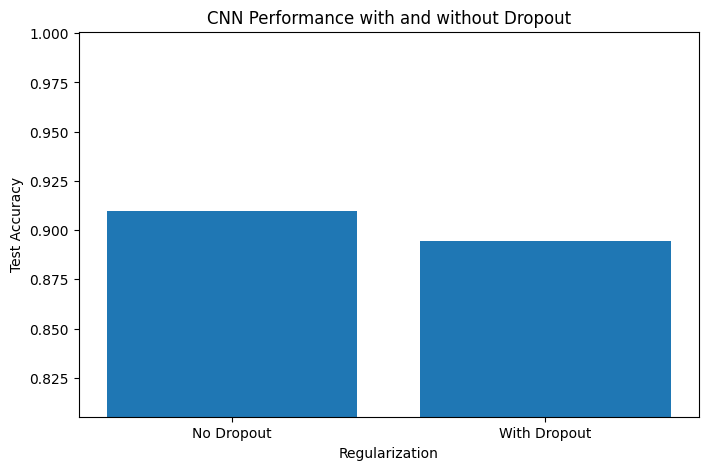

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt

# Reshape data if not already done
if X_train.shape[-1] != 1:
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)

# Define regularization options to test
regularization_options = {
    "No Dropout": False,
    "With Dropout": True
}
results_regularization = {}

print("Experimenting with Dropout regularization:")

for name, use_dropout in regularization_options.items():
    print(f"\nTraining model {name}...")

    # Re-initialize the model for each experiment
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    if use_dropout:
        model.add(Dropout(0.5)) # Add dropout layer with a rate of 0.5
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss=categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])

    # Train the model (using fewer epochs for quicker experimentation)
    history = model.fit(X_train, y_train_one_hot, epochs=5, validation_split=0.2, verbose=0) # verbose=0 to reduce output

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0) # verbose=0 to reduce output
    print(f"Test Accuracy {name}: {accuracy:.4f}")

    # Store the results
    results_regularization[name] = accuracy

# Print summary of regularization experiments
print("\nRegularization Experiment Results (Dropout):")
for name, accuracy in results_regularization.items():
    print(f"{name}: Test Accuracy: {accuracy:.4f}")

# Optional: Visualize the results
plt.figure(figsize=(8, 5))
plt.bar(results_regularization.keys(), results_regularization.values())
plt.xlabel("Regularization")
plt.ylabel("Test Accuracy")
plt.title("CNN Performance with and without Dropout")
plt.ylim(min(results_regularization.values()) * 0.9, max(results_regularization.values()) * 1.1) # Adjust y-axis limits for better visualization
plt.show()

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**
The hyperparameter experiment resullted in 128 filters having the best results. Each time more filters were added the accuracy improved. This could be because the model had more diverse features from the original input data to learn from with the addition of more filters.              Also experimenting with regularization dropout did not give the best results instead no dropout performed best. Perhaps 5 epochs was to low a number to effective test or dropout rate of 0.5 was too high. The combination of 128 filters and no drpout was the most effective at helping to more acurately identify unseen data, as measured by test accuracy.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

# Reshape data if not already done (important if running this cell independently)
if X_train.shape[-1] != 1:
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)

# Define the final model with the best hyperparameters and regularization
# Best: 128 filters, No Dropout
final_model = Sequential()
final_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
final_model.add(MaxPooling2D(pool_size=(2, 2)))
final_model.add(Flatten())
final_model.add(Dense(128, activation='relu'))
final_model.add(Dense(10, activation='softmax')) # Output layer with softmax activation

# Compile the final model
final_model.compile(loss=categorical_crossentropy,
                    optimizer=Adam(),
                    metrics=['accuracy'])

# Train the final model (using more epochs for potentially better performance)
print("Training the final model...")
history_final = final_model.fit(X_train, y_train_one_hot, epochs=10, validation_split=0.2)

# Evaluate the final model
print("\nEvaluating the final model...")
loss_final, accuracy_final = final_model.evaluate(X_test, y_test_one_hot)
print(f"Final Test Loss: {loss_final:.4f}")
print(f"Final Test Accuracy: {accuracy_final:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the final model...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 109s 72ms/step - accuracy: 0.8173 - loss: 0.5039 - val_accuracy: 0.8949 - val_loss: 0.2963
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 141s 72ms/step - accuracy: 0.9020 - loss: 0.2662 - val_accuracy: 0.9030 - val_loss: 0.2654
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 107s 71ms/step - accuracy: 0.9283 - loss: 0.2000 - val_accuracy: 0.9103 - val_loss: 0.2441
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 107s 71ms/step - accuracy: 0.9392 - loss: 0.1653 - val_accuracy: 0.8976 - val_loss: 0.2909
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 112s 74ms/step - accuracy: 0.9490 - loss: 0.1366 - val_accuracy: 0.9123 - val_loss: 0.2611
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 106s 71ms/step - accuracy: 0.9583 - loss: 0.1110 - val_accuracy: 0.9158 - val_loss: 0.2747
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 107s 71ms/step - accuracy: 0.9675 - loss: 0.0894 - val_accuracy: 0.9147 - val_loss: 0.2813
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**
The final model correctly classified approximately 90.05% of the images accurately in the test dataset. This is a good accuracy and a significant improvement over the baseline model. The model demonstrates a strong ability to classify images from the Fashion MNIST dataset, achieving a high accuracy on unseen data. The training loss consistently decreased with each epoch, with the tenth epoch havung a 0.0451 training loss and the final test loss being 0.4303.
Of the three models the simple CNN has the best performance. I dont quite know why would this be. CNNs are better suited than linear models for image data. This is based on the test loss and accuracy rates.
Other experimennts could be other hyperparameters, combination regularization tuning techniques, or different model architectures.


🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.